In [52]:
import numpy as np 
import pandas as pd 
import os 
import random 
from tqdm import tqdm 
import torch 
import torch.nn as nn 
import json 
import matplotlib.pyplot as plt 
from transformers import AutoTokenizer, AlbertTokenizer, AutoModelForSequenceClassification
import pickle
from random import randrange # needed for random agent
from sklearn.utils.class_weight import compute_class_weight
from pytorch_tabnet.tab_model import TabNetClassifier, TabNetRegressor 
from sklearn.metrics import f1_score  
from datetime import timedelta
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import ccxt
import pandas_ta as ta

# High Model

In [12]:
chart_df = pd.read_csv("../datasets/fgh-claims-data/augmented_4hrs_btcusdt (2).csv") 

train_size = int(chart_df.shape[0] * 0.8) 
train_df = chart_df.iloc[:train_size,:] 

val_size = int(chart_df.shape[0] * 0.1) 
val_df = chart_df.iloc[train_size:train_size+val_size,:]  

test_df = chart_df.iloc[train_size+val_size:, :] 

input_columns = [] 
for col in train_df.columns:
    if col != 'low_delta' and col != 'year' and col != 'datetime' and col != 'high_delta': 
        input_columns.append(col) 


X_train = train_df[input_columns].values
Y_train = train_df['high_delta'].values 
Y_train = Y_train.reshape((-1,1))

X_val = val_df[input_columns].values
Y_val = val_df['high_delta'].values 
Y_val = Y_val.reshape((-1,1))

X_test = test_df[input_columns].values 
Y_test = test_df['high_delta'].values  
Y_test = Y_test.reshape((-1,1)) 


reg = TabNetRegressor(seed=0, verbose=20)

reg.fit(X_train, Y_train, 
            eval_set=[(X_val, Y_val)], 
            max_epochs=100, 
            patience=100)   

Y_pred = reg.predict(X_test).flatten()

print("MSE = {}".format(mean_squared_error(Y_test, Y_pred))) 
print("MAE = {}".format(mean_absolute_error(Y_test, Y_pred)))   

Device used : cuda
epoch 0  | loss: 0.19594 | val_0_mse: 0.00019 |  0:00:03s
epoch 20 | loss: 0.00027 | val_0_mse: 0.00011 |  0:00:55s
epoch 40 | loss: 0.00021 | val_0_mse: 0.0001  |  0:01:46s
epoch 60 | loss: 0.00019 | val_0_mse: 0.0001  |  0:02:37s
epoch 80 | loss: 0.00017 | val_0_mse: 0.0001  |  0:03:28s
Stop training because you reached max_epochs = 100 with best_epoch = 95 and best_val_0_mse = 9e-05
Best weights from best epoch are automatically used!
MSE = 9.73852303160865e-05
MAE = 0.006907965510449601


In [13]:
reg.save_model("reg_high_chart_only_seed0")

Successfully saved model at reg_high_chart_only_seed0.zip


'reg_high_chart_only_seed0.zip'

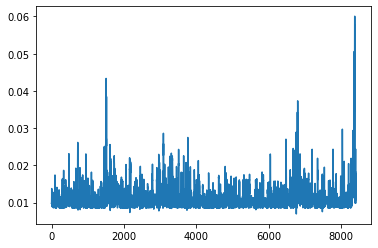

In [30]:
plt.plot(p0)

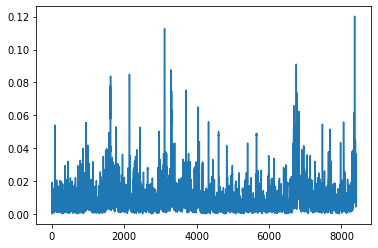

In [31]:
plt.plot(Y_test)

In [32]:
good, bad, neutral = 0,0,0 

for i in range(len(p0)):
    if Y_test[i] >= 0.01 and p0[i] >= 0.01 and p0[i] <= Y_test[i]:
        good += 1 
    elif Y_test[i] >= 0.01 and p0[i] >= 0.01 and p0[i] > Y_test[i]: 
        bad += 1 
    else:
        neutral += 1 

good: 46.12%
bad: 18.21%
neutral: 35.67%


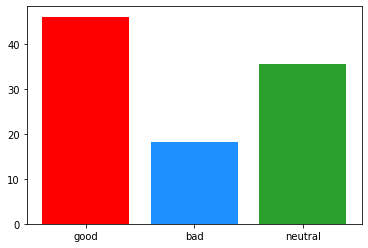

In [40]:
total, good, bad, neutral = 0, 0, 0, 0 
for i in range(len(Y_test)): 
    if np.abs(Y_test[i]) >= 0.01:
        total += 1 
        if np.abs(p0[i]) >= 0.01 and np.abs(p0[i]) <= np.abs(Y_test[i]):
            good += 1 
        elif np.abs(p0[i]) >= 0.01 and np.abs(p0[i]) > np.abs(Y_test[i]):
            bad += 1 
        elif np.abs(p0[i]) < 0.01:
            neutral += 1

good_prop, bad_prop, neutral_prop = good / total * 100, bad / total * 100, neutral / total * 100 
print("good: {:.2f}%".format(good / total * 100))
print("bad: {:.2f}%".format(bad / total * 100))
print("neutral: {:.2f}%".format(neutral / total * 100)) 


x = np.arange(3)
labels = ['good', 'bad', 'neutral']
values = [good_prop, bad_prop, neutral_prop]
colors = ['red', 'dodgerblue', 'C2']

plt.bar(x, values, color=colors)
plt.xticks(x, labels)

plt.show()

# Low Model

In [92]:
chart_df = pd.read_csv("../datasets/fgh-claims-data/augmented_4hrs_btcusdt (2).csv") 

train_size = int(chart_df.shape[0] * 0.8) 
train_df = chart_df.iloc[:train_size,:] 

val_size = int(chart_df.shape[0] * 0.1) 
val_df = chart_df.iloc[train_size:train_size+val_size,:]  

test_df = chart_df.iloc[train_size+val_size:, :] 

input_columns = [] 
for col in train_df.columns:
    if col != 'low_delta' and col != 'year' and col != 'datetime' and col != 'high_delta': 
        input_columns.append(col) 


X_train = train_df[input_columns].values
Y_train = train_df['low_delta'].values 
Y_train = Y_train.reshape((-1,1))

X_val = val_df[input_columns].values
Y_val = val_df['low_delta'].values 
Y_val = Y_val.reshape((-1,1))

X_test = test_df[input_columns].values 
Y_test = test_df['low_delta'].values  
Y_test = Y_test.reshape((-1,1)) 


reg = TabNetRegressor(seed=0, verbose=20)

reg.fit(X_train, Y_train, 
            eval_set=[(X_val, Y_val)], 
            max_epochs=100, 
            patience=100)   

Y_pred = reg.predict(X_test).flatten()

print("MSE = {}".format(mean_squared_error(Y_test, Y_pred))) 
print("MAE = {}".format(mean_absolute_error(Y_test, Y_pred)))   

Device used : cuda
epoch 0  | loss: 0.20089 | val_0_mse: 0.00024 |  0:00:02s
epoch 20 | loss: 0.0003  | val_0_mse: 0.00014 |  0:00:55s
epoch 40 | loss: 0.00025 | val_0_mse: 0.00013 |  0:01:47s
epoch 60 | loss: 0.00023 | val_0_mse: 0.00013 |  0:02:39s
epoch 80 | loss: 0.00022 | val_0_mse: 0.00014 |  0:03:31s
Stop training because you reached max_epochs = 100 with best_epoch = 6 and best_val_0_mse = 0.00012
Best weights from best epoch are automatically used!
MSE = 0.00011205819344267874
MAE = 0.007567446783587154


In [93]:
reg.save_model("reg_low_chart_only_seed0") 

Successfully saved model at reg_low_chart_only_seed0.zip


'reg_low_chart_only_seed0.zip'

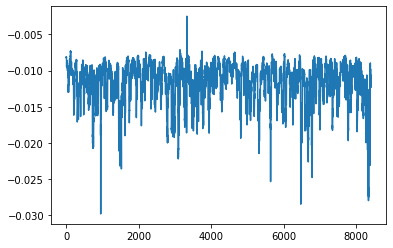

In [94]:
plt.plot(Y_pred)

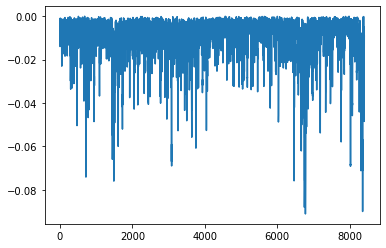

In [95]:
plt.plot(Y_test)

good: 55.61%
bad: 17.32%
neutral: 27.08%


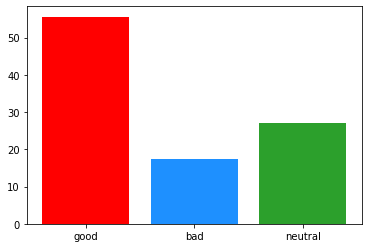

In [96]:
total, good, bad, neutral = 0, 0, 0, 0 
for i in range(len(Y_test)): 
    if np.abs(Y_test[i]) >= 0.01:
        total += 1 
        if np.abs(Y_pred[i]) >= 0.01 and np.abs(Y_pred[i]) <= np.abs(Y_test[i]):
            good += 1 
        elif np.abs(Y_pred[i]) >= 0.01 and np.abs(Y_pred[i]) > np.abs(Y_test[i]):
            bad += 1 
        elif np.abs(Y_pred[i]) < 0.01:
            neutral += 1

good_prop, bad_prop, neutral_prop = good / total * 100, bad / total * 100, neutral / total * 100 
print("good: {:.2f}%".format(good / total * 100))
print("bad: {:.2f}%".format(bad / total * 100))
print("neutral: {:.2f}%".format(neutral / total * 100)) 


x = np.arange(3)
labels = ['good', 'bad', 'neutral']
values = [good_prop, bad_prop, neutral_prop]
colors = ['red', 'dodgerblue', 'C2']

plt.bar(x, values, color=colors)
plt.xticks(x, labels)

plt.show()